### KNN using Boston Housing Data Set

Image Data Shape (1797, 64)
Label Data Shape (1797,)
digits.data[0] #first image is vector that needs reshaping 
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
digits.target[0] #first image is a ZERO (0):0
The following are the classes in this DIGITs classification problem: [0 1 2 3 4 5 6 7 8 9]
Class: 0 has 178 examples
Class: 1 has 182 examples
Class: 2 has 177 examples
Class: 3 has 183 examples
Class: 4 has 181 examples
Class: 5 has 182 examples
Class: 6 has 181 examples
Class: 7 has 179 examples
Class: 8 has 174 examples
Class: 9 has 180 examples
Train has 1347 examples
Test  has 450  examples
# Tuning hyper-parameters for accuracy

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   10.6s finished


Best parameters set found on development set:

Best hyper parameters are : {'n_neighbors': 1, 'p': 2}

Grid scores on development set:

accuracy  (+/-stdev*2)     hyper-params
0.978 (+/-0.005) for {'n_neighbors': 1, 'p': 1}
0.985 (+/-0.015) for {'n_neighbors': 1, 'p': 2}
0.985 (+/-0.008) for {'n_neighbors': 1, 'p': 3}
0.973 (+/-0.012) for {'n_neighbors': 2, 'p': 1}
0.979 (+/-0.010) for {'n_neighbors': 2, 'p': 2}
0.981 (+/-0.008) for {'n_neighbors': 2, 'p': 3}
0.981 (+/-0.009) for {'n_neighbors': 3, 'p': 1}
0.985 (+/-0.005) for {'n_neighbors': 3, 'p': 2}
0.985 (+/-0.008) for {'n_neighbors': 3, 'p': 3}
0.978 (+/-0.013) for {'n_neighbors': 4, 'p': 1}
0.984 (+/-0.013) for {'n_neighbors': 4, 'p': 2}
0.984 (+/-0.014) for {'n_neighbors': 4, 'p': 3}
0.983 (+/-0.015) for {'n_neighbors': 5, 'p': 1}
0.985 (+/-0.014) for {'n_neighbors': 5, 'p': 2}
0.984 (+/-0.013) for {'n_neighbors': 5, 'p': 3}

Detailed classification report:

The model is trained on the full development set.
The scores are compu

,Model,Dataset,TrainAcc,TestAcc,TrainTime(sec),TestTime(sec),Param,Description
0,knn,Digits,98.52%,99.11%,11.03 secs,0.00 secs,"{'n_neighbors': 1, 'p': 2}",5-foldCV-based gridSearch BEST model


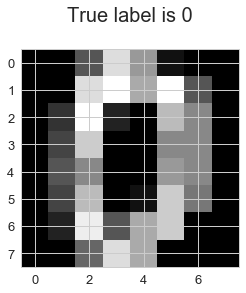

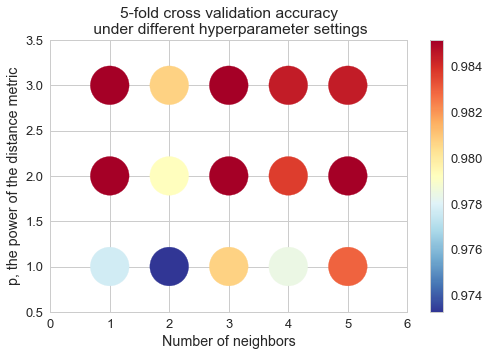

In [2]:
# Brief Template KNN Classifier that uses GridSearch

#This is a shortened template section  that will serve you well when tackling this week's homework. It is based on building a classifier to classify handwritten digits image into one of ten digits.

#For more information click [here Digits dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)


##  Load data and do some EDA

from __future__ import print_function
import numpy as np
import pandas as pd

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, PredefinedSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from datetime import datetime
from sklearn import datasets
from sklearn.datasets import load_digits

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Set style for plotting
sns.set(style="whitegrid", font_scale=1.3)
matplotlib.rcParams["legend.framealpha"] = 1
matplotlib.rcParams["legend.frameon"] = True


# Loading the Digits dataset
#------------------------------------------
digits = load_digits()

# Exploratory Data Analysis EDA
#------------------------------------------
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print(f"Image Data Shape {digits.data.shape}")
# Print to show there are 1797 labels (integers from 0-9)
print(f"Label Data Shape {digits.target.shape}")
print(f"digits.data[0] #first image is vector that needs reshaping \n{digits.data[0]}")
print(f"digits.target[0] #first image is a ZERO (0):{digits.target[0]}") 
print(f"The following are the classes in this DIGITs classification problem: {np.unique(digits.target)}")
for class_label, count in zip(np.arange(len(np.unique(digits.target))),
                          np.bincount(digits.target)):
    print(f"Class: {class_label} has {count} examples")
    
# Visualize first example digit
#------------------------------------------
plt.imshow(np.reshape(digits.data[0], (8,8)), cmap=plt.cm.gray)
plt.title('True label is %i\n' % digits.target[0], fontsize = 20)

# Split data into train and test subsets
#------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)
print(f"Train has {X_train.shape[0]} examples")
print(f"Test  has {X_test.shape[0]}  examples")


# Normalize the image grayscale images
#------------------------------------------
X_train /= 255
X_test /= 255

# Track experiments in a dataframe
#------------------------------------------
experimentLog = pd.DataFrame(columns=["Model", "Dataset", "TrainAcc", "TestAcc", "TrainTime(sec)", "TestTime(sec)", "Param", "Description",])
#experimentLog.loc[len(experimentLog)] = ["Knn Dummy", "a desc", 34, 34, "k=4, p=2", 6.4]# add a sample line


## Gridsearch to find the best hyperparameters for the KNN Classifier

#%%time

knn_sk = KNeighborsClassifier(n_jobs=-1) ## Use all available cores/CPUs on you machine to run search in parallel

# Gridsearch over these hyperparameters
#------------------------------------------
n_neighbors_range = list(range(1,6))   # number of neighbors
p_range =           list (range(1,4))  # power of the similarity function p =1 is Manhattan dist
parameters = {'n_neighbors': n_neighbors_range, 'p': p_range}

np.random.seed(42) # for multiple runs of the same model training, you should re-execute this line
start_time = datetime.now()   
score = 'accuracy' # limited to accuracuy for now but could use other metrics such as precision, recall, etc.
print("# Tuning hyper-parameters for %s" % score)
print()

# Do the Gridsearch to find the best KNN
#------------------------------------------
#  search through different hyperparameter settings for KNN
#  Once the best combination of parameters is determined via gridsearch
#  in collaboration with crossfold valdiation
#  a KNN model is trained on the whole dataset using the best found parameters 
gridSearch_knn = GridSearchCV(estimator=knn_sk, 
                          param_grid=parameters,  
                          cv=5, 
                          #refit=False,  
                          return_train_score=False,
                          verbose=1,
                          # Refit an estimator using the best found parameters on the whole dataset.
                          refit=True, 
                          n_jobs=-1  #use multiple CPUs; divide and conquer!
                          )
gridSearch_knn.fit(X_train, y_train)

# Prepare a report the KNN hyperparamter search
#------------------------------------------------
print("Best parameters set found on development set:")
print()
print(f"Best hyper parameters are : {gridSearch_knn.best_params_}")
print()
print("Grid scores on development set:")
print()

means = gridSearch_knn.cv_results_['mean_test_score']  #access elements of the grid search results dictionary
stds = gridSearch_knn.cv_results_['std_test_score']
print(f'{score}  (+/-stdev*2)     hyper-params')
for mean, std, params in zip(means, stds, gridSearch_knn.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()
end_time = datetime.now()
wallTimeInSecondsTrain = (end_time - start_time).total_seconds()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
start_time = datetime.now()   
end_time = datetime.now()
wallTimeInSecondsTest = (end_time - start_time).total_seconds()
trainAcc = gridSearch_knn.best_score_ #CV accuracy score for best hyperparameter combo
    
# Evaluate the best KNN on the test set
#------------------------------------------
y_true, y_pred = y_test, gridSearch_knn.predict(X_test)
testAcc  = accuracy_score(y_true, y_pred)
experimentLog.loc[len(experimentLog)] =["knn", "Digits", f"{trainAcc*100:8.2f}%", f"{testAcc*100:8.2f}%", 
                                    f"{wallTimeInSecondsTrain:8.2f} secs", f"{wallTimeInSecondsTest:8.2f} secs",
                                    f"{gridSearch_knn.best_params_}","5-foldCV-based gridSearch BEST model"]
print(experimentLog)
print("best_p: ",gridSearch_knn.best_params_["p"])
print("best_n: ",gridSearch_knn.best_params_["n_neighbors"])

## Visualize the performance metrics along each hyperparameter
#---------------------------------------------------------------
plt.figure(figsize=(8, 5))
sc = plt.scatter(gridSearch_knn.cv_results_["param_n_neighbors"], 
                 gridSearch_knn.cv_results_["param_p"], 
                 c=gridSearch_knn.cv_results_["mean_test_score"], 
                 cmap = plt.get_cmap("RdYlBu_r"), 
                 s=1500)
plt.colorbar(sc)
plt.grid(True)
plt.gca().set_axisbelow(True)
plt.xlabel("Number of neighbors")
plt.ylabel("p, the power of the distance metric")
plt.title("5-fold cross validation accuracy\n under different hyperparameter settings")
plt.xlim([0, 6])
plt.ylim([0.5, 3.5]);

#Let's choose the best $p^*$ and see how accuracy depends on the number of nearest neightbors for a KNN classifier  $p$

experimentLog

## CIFAR10 Image classification dataset
We will be building an image classification system using the  CIFAR10 image classification dataset. This system will class images of belonging to 10 classes of objects. The label data for the test data is just a list of 10,000 numbers ranging from 0 to 9, which corresponds to each of the 10 classes in CIFAR-10. (And similarly for the training set.
* airplane : 0
* automobile : 1
* bird : 2
* cat : 3
* deer : 4
* dog : 5
* frog : 6
* horse : 7
* ship : 8
* truck : 9

The classes are completely mutually exclusive.  There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. 

For the purposes of evaluation we have a separate test set consisting of images from the same ten classes that were used for training. Any system (such as a KNN classifier) trained on this dataset will not do well in the following scenarios:

* with images that are NOT in the ten classes, i.e., images must come from the same ten classes for this system to work well.
* with images that have a size other than 32 by 32 pixels spatially, i.e., images must be 32x32 pixels
* with images that have a different color space such as gray scale, i.e., images need to be in the RGB space.


The [CIFAR-10](http://www.cs.toronto.edu/~kriz/cifar.html) dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. Each image is matrix with dimensions:  width x height x RGB_num_channel

## Load dataset and get class train/test counts

In [3]:
%%time
from __future__ import print_function
import keras
from keras.datasets import cifar10
import os
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, PredefinedSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from datetime import datetime

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#Set style for plotting
sns.set(style="whitegrid", font_scale=1.3)
matplotlib.rcParams["legend.framealpha"] = 1
matplotlib.rcParams["legend.frameon"] = True

# Fix random seed for reproducibility
np.random.seed(42)
num_classes = 10

# The data, split between train and test sets:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

y_train = np.reshape(y_train, (-1)) #reshape the y matrix to a y vector
y_test  = np.reshape(y_test, (-1))

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Wall time: 578 ms


## How many test cases/images in the  CIFAR10 test dataset?
- The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

In [4]:
print(f"Train size:, {X_train.shape}")
print(f"Train size:, Exs: {X_train.shape[0]}, Width:{X_train.shape[1]}, Height:{X_train.shape[2]}, :Num_of_RGB_channels:{X_train.shape[3]}")

Train size:, (50000, 32, 32, 3)
Train size:, Exs: 50000, Width:32, Height:32, :Num_of_RGB_channels:3


The label data for the test data is just a list of 10,000 numbers ranging from 0 to 9, which corresponds to each of the 10 classes in CIFAR-10. (And similarly for the training set.
* airplane : 0
* automobile : 1
* bird : 2
* cat : 3
* deer : 4
* dog : 5
* frog : 6
* horse : 7
* ship : 8
* truck : 9

### Data is arranged in #R G B R G B R G B..... R G B

In [5]:
print(f"digits.target[0] #first image is a ZERO (0):{y_test[0]}") 
print(f"The following are the classes in this CIFAR classification problem: {np.unique(y_test)}")
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

for class_label, label, count in zip(np.arange(len(np.unique(y_test))), label_names, np.bincount(y_test)):
    print(f"Class: {class_label} {label:<11} has {count} examples")

digits.target[0] #first image is a ZERO (0):3
The following are the classes in this CIFAR classification problem: [0 1 2 3 4 5 6 7 8 9]
Class: 0 airplane    has 1000 examples
Class: 1 automobile  has 1000 examples
Class: 2 bird        has 1000 examples
Class: 3 cat         has 1000 examples
Class: 4 deer        has 1000 examples
Class: 5 dog         has 1000 examples
Class: 6 frog        has 1000 examples
Class: 7 horse       has 1000 examples
Class: 8 ship        has 1000 examples
Class: 9 truck       has 1000 examples


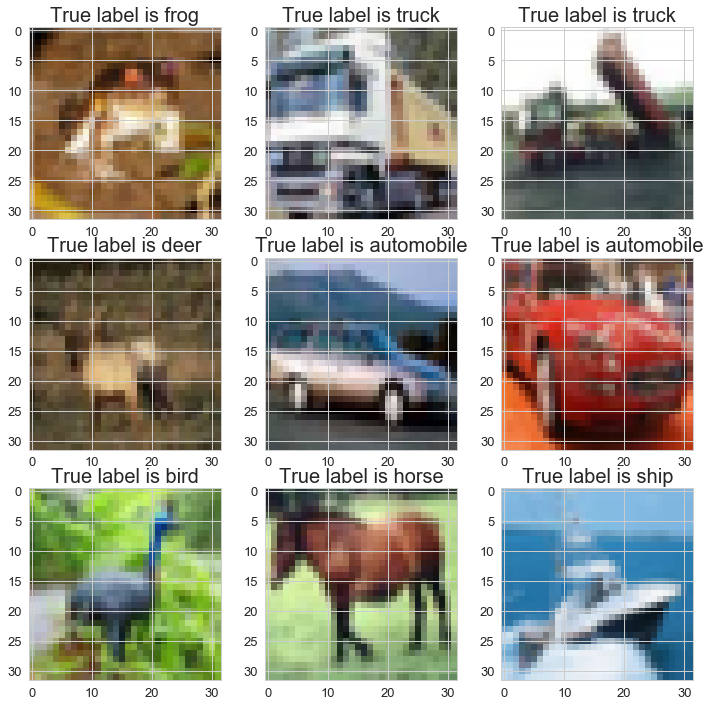

In [6]:
plt.figure(figsize=(12,12))
for index, (image, label_idx) in enumerate(zip(X_train[0:9], y_train[0:9])):
    plt.subplot(3, 3, index + 1)
    plt.imshow(image)
    plt.title(f'True label is {label_names[label_idx]}', fontsize = 20)

### Flatten the image matrix of 32x32x3 to a vector of 3072 values

In [7]:
X_train = np.reshape(X_train, (-1,3072))
X_train.shape

(50000, 3072)

In [8]:
X_test = np.reshape(X_test, (-1,3072))
X_test.shape

(10000, 3072)

In [9]:
#Full datasets
X_train_full = X_train
y_train_full = y_train
X_test_full = X_test
y_test_full = y_test

In [10]:
# Taking a random 2% of the sample training and test sets
subsample_rate = 0.02

In [11]:
#Stratification for same quantity ratio between classes
X_train, _, y_train, _ = train_test_split(X_train, y_train, stratify=y_train, 
                                          train_size=subsample_rate, random_state=42)

C:\Users\student\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [12]:
X_test, _, y_test, _ = train_test_split(X_test, y_test, stratify=y_test, 
                                        train_size=subsample_rate, random_state=42)

C:\Users\student\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [13]:
# The data, split between train and test sets:
print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')


x_train shape: (1000, 3072)
1000 train samples
200 test samples


In [14]:
y_subset = y_test[0:100]
 
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

for class_label, label, count in zip(np.arange(len(np.unique(y_subset))), label_names, np.bincount(y_subset)):
    print(f"Class: {class_label} {label:<11} has {count} examples")


Class: 0 airplane    has 9 examples
Class: 1 automobile  has 10 examples
Class: 2 bird        has 9 examples
Class: 3 cat         has 7 examples
Class: 4 deer        has 8 examples
Class: 5 dog         has 12 examples
Class: 6 frog        has 14 examples
Class: 7 horse       has 14 examples
Class: 8 ship        has 9 examples
Class: 9 truck       has 8 examples


# Solving image classification via KNN Classifier and GridSearchCV

In [15]:
knn_sk = KNeighborsClassifier(n_jobs=-1)
# comfirm we are using a subsample of the data
X_train.shape # 1000 training examples

(1000, 3072)

In [16]:
%%time
from __future__ import print_function
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, PredefinedSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from datetime import datetime
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
#Set style for plotting
sns.set(style="whitegrid", font_scale=1.3)
matplotlib.rcParams["legend.framealpha"] = 1
matplotlib.rcParams["legend.frameon"] = True
knn_sk = KNeighborsClassifier(n_jobs=1)
# Set the parameters used by cross-validation
#==================================================#
n_neighbors_range = list(range(1,6))   # number of neighbors
p_range =           list (range(1,2))
#==================================================#
parameters = {'n_neighbors': n_neighbors_range, 'p': p_range}
np.random.seed(42) # for multiple runs of the same model training, you should re-execute this line
score = 'accuracy'  # limited to accuracuy for now but could use other metrics such as precision, recall, etc.
start_time = datetime.now()   
print("# Tuning hyper-parameters for %s" % score)
print()
gridSearch = GridSearchCV(estimator=knn_sk, 
                          param_grid=parameters,  
                          cv=5, 
                          refit=True,  
                          return_train_score=False,
                          verbose=1,
                          n_jobs=-1  #use multiple CPUs; divide and conquer!
                          )
gridSearch.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(gridSearch.best_params_)
print()
print("Grid scores on development set:")
print()
print(f'{score}  (+/-stdev*2)     hyper-params')
means = gridSearch.cv_results_['mean_test_score']  #access elements of the grid search results dictionary
stds = gridSearch.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gridSearch.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()
end_time = datetime.now()
wallTimeInSecondsTrain = (end_time - start_time).total_seconds()
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
start_time = datetime.now()   
y_true, y_pred = y_test, gridSearch.predict(X_test)
end_time = datetime.now()
wallTimeInSecondsTest = (end_time - start_time).total_seconds()
print(classification_report(y_true, y_pred))  # more detailed breakdown of the test perf; optional for now
print()
trainAcc = gridSearch.best_score_ #CV accuracy score for best hyperparameter combo
    
testAcc  = accuracy_score(y_true, y_pred)
# Track experiments in a dataframe
#------------------------------------------
try: experimentLog   ### if not defined then setup the experiment dataframe
except : experimentLog = pd.DataFrame(columns=["Model", "Dataset", "TrainAcc", "TestAcc", 
                                               "TrainTime(sec)", "TestTime(sec)", "Param", "Description",])
#experimentLog = pd.DataFrame(columns=["Model", "TrainAcc", "TestAcc", "TrainTime(sec)", "TestTime(sec)", "Params", "Description",])
experimentLog

# Tuning hyper-parameters for accuracy

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   14.6s finished


Best parameters set found on development set:

{'n_neighbors': 4, 'p': 1}

Grid scores on development set:

accuracy  (+/-stdev*2)     hyper-params
0.236 (+/-0.039) for {'n_neighbors': 1, 'p': 1}
0.211 (+/-0.027) for {'n_neighbors': 2, 'p': 1}
0.225 (+/-0.030) for {'n_neighbors': 3, 'p': 1}
0.257 (+/-0.043) for {'n_neighbors': 4, 'p': 1}
0.247 (+/-0.034) for {'n_neighbors': 5, 'p': 1}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          0       0.21      0.45      0.29        20
          1       1.00      0.05      0.10        20
          2       0.16      0.35      0.22        20
          3       0.00      0.00      0.00        20
          4       0.25      0.40      0.31        20
          5       0.00      0.00      0.00        20
          6       0.20      0.20      0.20        20
          7       0.20      0.05      0.08        

In [17]:
best_p = gridSearch.best_params_["p"]
best_n = gridSearch.best_params_["n_neighbors"]
print("best_p: ",best_p)
print("best_n: ",best_n)

best_p:  1
best_n:  4


In [18]:
print (gridSearch.cv_results_)
gridSearch.best_score_
acc = gridSearch.best_score_
print("KNN Grid Search Sklearn", np.round(acc, 3))

{'mean_fit_time': array([0.28890834, 0.32025208, 0.34986148, 0.39029694, 0.36423745]), 'std_fit_time': array([0.01391005, 0.03060907, 0.01195179, 0.03597865, 0.01500215]), 'mean_score_time': array([1.97898073, 2.21985736, 2.36588998, 2.35394373, 2.17443109]), 'std_score_time': array([0.05004979, 0.07557657, 0.09193522, 0.11509586, 0.25124585]), 'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_p': masked_array(data=[1, 1, 1, 1, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_neighbors': 1, 'p': 1}, {'n_neighbors': 2, 'p': 1}, {'n_neighbors': 3, 'p': 1}, {'n_neighbors': 4, 'p': 1}, {'n_neighbors': 5, 'p': 1}], 'split0_test_score': array([0.225, 0.22 , 0.225, 0.22 , 0.245]), 'split1_test_score': array([0.225, 0.19 , 0.205, 0.25 , 0.235]), 'split2_test_score': array([0.215, 0.21 , 0.25 , 0.285, 0.2

### Exploratory Data

We explored a grid of 3x5 (15 experiments), `gridSearch.cv_results_['params']`:: 

`
accuracy  (+/-stdev*2)     hyper-params
0.236 (+/-0.039) for {'n_neighbors': 1, 'p': 1}
0.236 (+/-0.019) for {'n_neighbors': 1, 'p': 2}
0.231 (+/-0.023) for {'n_neighbors': 1, 'p': 3}
0.211 (+/-0.027) for {'n_neighbors': 2, 'p': 1}
0.204 (+/-0.042) for {'n_neighbors': 2, 'p': 2}
0.186 (+/-0.038) for {'n_neighbors': 2, 'p': 3}
0.225 (+/-0.030) for {'n_neighbors': 3, 'p': 1}
0.237 (+/-0.042) for {'n_neighbors': 3, 'p': 2}
0.221 (+/-0.028) for {'n_neighbors': 3, 'p': 3}
0.257 (+/-0.043) for {'n_neighbors': 4, 'p': 1}
0.240 (+/-0.020) for {'n_neighbors': 4, 'p': 2}
0.227 (+/-0.045) for {'n_neighbors': 4, 'p': 3}
0.247 (+/-0.034) for {'n_neighbors': 5, 'p': 1}
0.254 (+/-0.026) for {'n_neighbors': 5, 'p': 2}
0.244 (+/-0.039) for {'n_neighbors': 5, 'p': 3}
`
 
 Each of these experiments led to the follow mean accuracy scores (over 5 fold CV) using: 
 
 `>>>gridSearch.cv_results_['mean_test_score']`:
  
  `
  'mean_test_score': array([0.236, 0.236, 0.231, 0.211, 0.204, 0.186, 0.225, 0.237, 0.221,
        0.257, 0.24 , 0.227, 0.247, 0.254, 0.244])
  `
  
  The CV accuracy score for best hyperparameter combo can be extracted from the GridSearch as follows:
  
 `>>> gridSearch.best_score_ #CV accuracy score for best hyperparameter combo`
`0.257`

  Based on these accuracy scores the best hyperparamters are ` 'n_neighbors': 1, 'p': 2` with an accuracy of **0.257** (`25.7%` accuracy). This accuracy is very simialar to than other hyperparamter combinations (this is a small dataset that exhibits a perforance plateau. However, one could dispute that 0.257 is not that different to 0.254. In practice, we might choose a simpler model (e.g., a 1-neighbors solution ) as it is cheaper to compute even it was not the best performer.   Later in this course we will study how to make a more principled decision based on statistical significance tests.

## Visualize Data

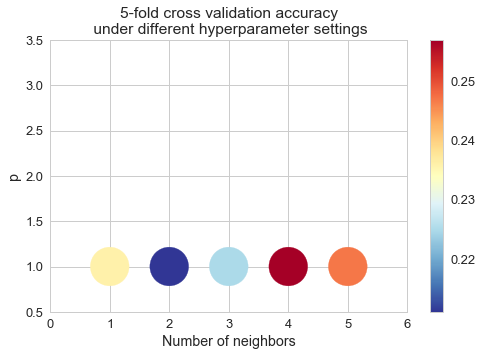

In [19]:
plt.figure(figsize=(8, 5))
sc = plt.scatter(gridSearch.cv_results_["param_n_neighbors"], 
                 gridSearch.cv_results_["param_p"], 
                 c=gridSearch.cv_results_["mean_test_score"], 
                 cmap = plt.get_cmap("RdYlBu_r"), 
                 s=1500)
plt.colorbar(sc)
plt.grid(True)
plt.gca().set_axisbelow(True)
plt.xlabel("Number of neighbors")
plt.ylabel("p")
plt.title("5-fold cross validation accuracy\n under different hyperparameter settings")
plt.xlim([0, 6])
plt.ylim([0.5, 3.5]);

In [20]:
p_idx = gridSearch.cv_results_["param_p"].data == best_p

Choosing the best $p^*$ and see how accuracy depends on the number of nearest neightbors for a KNN classifier  $p$

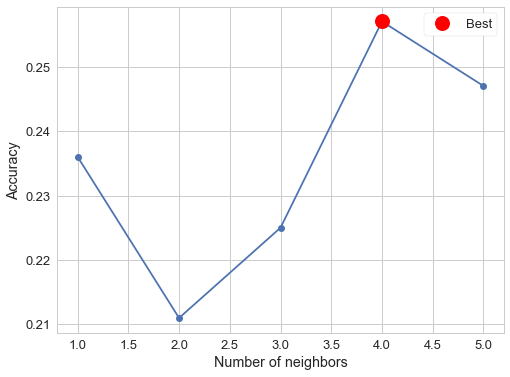

In [21]:
plt.figure(figsize=(8,6))
plt.plot(gridSearch.cv_results_["param_n_neighbors"].data[p_idx], 
         gridSearch.cv_results_["mean_test_score"][p_idx], 
         "o-")
plt.plot([best_n], [gridSearch.cv_results_["mean_test_score"][p_idx][best_n - 1]], "or", markersize=15, label="Best")
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.title("")
plt.grid(True)
plt.legend(numpoints=1)
plt.show()

In [22]:
experimentLog
#For the grid search

,Model,Dataset,TrainAcc,TestAcc,TrainTime(sec),TestTime(sec),Param,Description
0,knn,Digits,98.52%,99.11%,11.03 secs,0.00 secs,"{'n_neighbors': 1, 'p': 2}",5-foldCV-based gridSearch BEST model


In [23]:
%time
import keras
from keras.datasets import cifar10
import os
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, PredefinedSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from datetime import datetime
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#Set style for plotting
sns.set(style="whitegrid", font_scale=1.3)
matplotlib.rcParams["legend.framealpha"] = 1
matplotlib.rcParams["legend.frameon"] = True

# Fix random seed for reproducibility
np.random.seed(42)

# Reload the data and downsample the train to 50%
#==================================================#
# The data, split between train and test sets:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = np.reshape(X_train, (-1,3072))
X_test = np.reshape(X_test, (-1,3072))
y_train = np.reshape(y_train, (-1)) #reshape the y matrix to a y vector
y_test  = np.reshape(y_test, (-1))
subsample_rate = 0.5
X_train, _, y_train, _ = train_test_split(X_train, y_train, stratify=y_train, train_size=subsample_rate, random_state=42)
knn = KNeighborsClassifier(n_neighbors=gridSearch.best_params_["n_neighbors"], 
                           p=gridSearch.best_params_["p"], n_jobs=-1) 

start_time = datetime.now()  
knn.fit(X_train, y_train)  # make sure X_train, y_train has 100% of the training data
end_time = datetime.now()
wallTimeInSecondsTrain = (end_time - start_time).total_seconds()
print("Training time (s): ", wallTimeInSecondsTrain)

start_time = datetime.now()   
y_preds_full = knn.predict(X_test_full)  
end_time = datetime.now()
wallTimeInSecondsTest = (end_time - start_time).total_seconds()
print("Test data prediction time (s): ", wallTimeInSecondsTest)
testAcc = accuracy_score(y_test_full, y_preds_full)

Wall time: 0 ns


C:\Users\student\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Training time (s):  17.735419
Test data prediction time (s):  483.57896


In [24]:
## Trying to improved Weighted KNN
%time
import keras
from keras.datasets import cifar10
import os
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, PredefinedSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from datetime import datetime
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#Set style for plotting
sns.set(style="whitegrid", font_scale=1.3)
matplotlib.rcParams["legend.framealpha"] = 1
matplotlib.rcParams["legend.frameon"] = True

# Fix random seed for reproducibility
np.random.seed(42)

# Reload the data and downsample train and test to 2%
#==================================================#
# The data, split between train and test sets:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = np.reshape(X_train, (-1,3072))
X_test = np.reshape(X_test, (-1,3072))
y_train = np.reshape(y_train, (-1)) #reshape the y matrix to a y vector
y_test  = np.reshape(y_test, (-1))
subsample_rate = 0.02
X_train, _, y_train, _ = train_test_split(X_train, y_train, stratify=y_train, train_size=subsample_rate, random_state=42)
X_test, _, y_test, _ = train_test_split(X_test, y_test, stratify=y_test, train_size=subsample_rate, random_state=42)

knn_weighted= KNeighborsClassifier(weights= 'distance', n_jobs=-1)

n_neighbors_range = list(range(1,6))
p_range = list (range(1,4))
parameters = {'n_neighbors': n_neighbors_range, 'p': p_range}
start_time = datetime.now()
knn_weighted_gs = GridSearchCV(knn_weighted, parameters, cv=5, n_jobs=-1, verbose=2)
knn_weighted_gs.fit(X_train, y_train)
end_time = datetime.now()
wallTimeInSecondsTrain = (end_time - start_time).total_seconds()

Wall time: 0 ns


C:\Users\student\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed: 11.9min finished


In [25]:
print('Best parameters:', knn_weighted_gs.best_params_)

Best parameters: {'n_neighbors': 5, 'p': 1}


In [26]:
train_acc = knn_weighted_gs.best_score_ 

start_time = datetime.now()   
test_preds = knn_weighted_gs.best_estimator_.predict(X_test)
test_acc = accuracy_score(y_test, test_preds)
end_time = datetime.now()
wallTimeInSecondsTest = (end_time - start_time).total_seconds()

In [27]:
# Track experiments in a dataframe
#------------------------------------------
try: experimentLog 
except : experimentLog = pd.DataFrame(columns=["Model", "Dataset", "TrainAcc", "TestAcc", 
                                               "TrainTime(sec)", "TestTime(sec)", "Param", "Description",])
experimentLog.loc[len(experimentLog)] =["KNN Weighted Test GS", "Cifar10", f"{train_acc*100:8.2f}%", f"{test_acc*100:8.2f}%", 
                                    f"{wallTimeInSecondsTrain:8.2f} secs", f"{wallTimeInSecondsTest:8.2f} secs",
                                    f"{knn_weighted_gs.best_params_}","5-foldCV-based gridSearch BEST model"]

In [28]:
experimentLog

,Model,Dataset,TrainAcc,TestAcc,TrainTime(sec),TestTime(sec),Param,Description
0,knn,Digits,98.52%,99.11%,11.03 secs,0.00 secs,"{'n_neighbors': 1, 'p': 2}",5-foldCV-based gridSearch BEST model
1,KNN Weighted Test GS,Cifar10,27.20%,26.50%,712.98 secs,0.36 secs,"{'n_neighbors': 5, 'p': 1}",5-foldCV-based gridSearch BEST model


## Homemade KNN with CIFAR 10 Dataset

In [30]:
%time
import keras
from keras.datasets import cifar10
import os
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, PredefinedSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from datetime import datetime
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Fix random seed for reproducibility
np.random.seed(42)

# Reload the data and downsample train and test to 2%
#==================================================#
# The data, split between train and test sets:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = np.reshape(X_train, (-1,3072))
X_test = np.reshape(X_test, (-1,3072))
y_train = np.reshape(y_train, (-1)) #reshape the y matrix to a y vector
y_test  = np.reshape(y_test, (-1))
subsample_rate = 0.10  #use 10% of the data
X_train, _, y_train, _ = train_test_split(X_train, y_train, stratify=y_train, train_size=subsample_rate, random_state=42)
X_test, _, y_test, _ = train_test_split(X_test, y_test, stratify=y_test, train_size=subsample_rate, random_state=42)
start_time = datetime.now()

n = 3
predicted_classes = np.zeros(shape=(X_test.shape[0]), dtype=np.int)
for i in range(X_test.shape[0]):predicted_classes[i]= np.argmax(np.bincount(y_train[np.argsort(np.linalg.norm(X_test[i]-X_train, ord = 2, axis= 1))[:n]]))


end_time = datetime.now()
wallTimeInSecondsTrain = (end_time - start_time).total_seconds()
print(f"\nThe KNN accuracy for k ={n} on the test set is {100 * accuracy_score(y_test, predicted_classes):.3}%")
print(f"wallTimeInSecondsTrain: {wallTimeInSecondsTrain}")

Wall time: 0 ns


C:\Users\student\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)



The KNN accuracy for k =3 on the test set is 18.5%
wallTimeInSecondsTrain: 129.42702
